In [30]:
import requests
import bs4
 

def write_text(fpath,text):
    with open(fpath, 'a', encoding='utf-8') as f:
            f.write(str(text)+'\n')
            f.write('\n')
            f.close()

            
def get_comment(url,pages,fpath):
    #首页
    res = requests.get(url)
    soup = bs4.BeautifulSoup(res.text,'html.parser')
    tags = soup.find_all('p',class_ = 'cmt_info')
    for tag in tags:
            text = tag.get_text()
            write_text(fpath,text)
    
    #之后每页迭代
    for i in range(pages):
        i = i+1
        path = url + '?page=' + str(i)
        r = requests.get(path)
        source = bs4.BeautifulSoup(r.text,'html.parser')
        contents = source.find_all('p',class_ = 'cmt_info')
        for content in contents:
            text = content.get_text()
            write_text(fpath,text)
    

In [31]:
fpath = 'C:/Users/91550/Desktop/internship/rating.txt'
url = 'https://www.liqucn.com/comment/1097495.shtml'
pages = 31

get_comment(url,pages,fpath)

In [45]:
def get_time(url,pages,fpath):
    #首页
    res = requests.get(url)
    soup = bs4.BeautifulSoup(res.text,'html.parser')
    tags = soup.find_all('span', class_ = '')
    for tag in tags:
            text = tag.get_text()
            write_text(fpath,text)
    
    #之后每一页迭代
    for i in range(pages):
        i = i+1
        path = url + '?page=' + str(i)
        r = requests.get(path)
        source = bs4.BeautifulSoup(r.text,'html.parser')
        contents = source.find_all('span', class_ = '')
        for content in contents:
            text = content.get_text()
            write_text(fpath,text)


In [46]:
fpath = 'C:/Users/91550/Desktop/internship/time.txt'
url = 'https://www.liqucn.com/comment/1097495.shtml'
pages = 31

get_time(url,pages,fpath)

In [34]:
import pandas as pd
data = pd.read_csv('rating.txt',sep = '\t',header = None)
ratings = data.loc[:,5]


In [47]:
import pandas as pd
time = pd.read_csv('time.txt',sep = '\t',header = None)
frame = pd.concat([ratings,time],axis = 1)
frame.columns = ['comments','date']


In [49]:
from dateutil import parser
frame["date"] = frame.date.apply(parser.parse)

In [166]:
from snownlp import SnowNLP
def get_score(sentence):
    s = SnowNLP(sentence)
    return s.sentiments

def get_keywords(sentence):
    s = s = SnowNLP(sentence)
    return s.keywords(limit = 10)

In [83]:
frame['scores'] = frame.comments.apply(get_score)
len(frame[frame.scores<0.5])

117

In [167]:
frame['words'] = frame.comments.apply(get_keywords)

In [1]:
frame.to_csv('评价加时间.csv',encoding="utf_8_sig")

NameError: name 'frame' is not defined

Text(0.5, 1.0, '舆情波动')

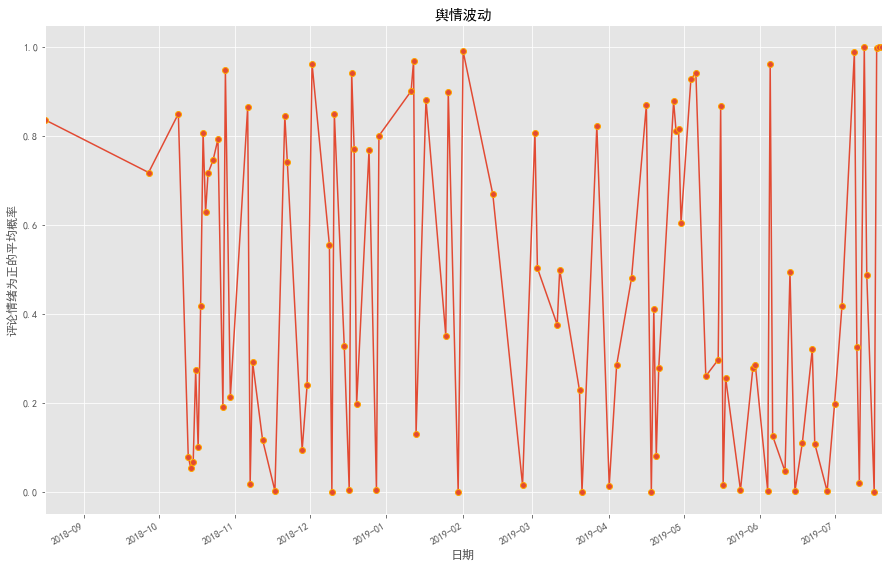

In [155]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

day_average = frame.groupby('date')['scores'].mean()
fig1 = plt.figure(1,figsize=(15,10))
day_average.plot(marker = 'o',mec = 'orange')
plt.xlabel('日期')
plt.ylabel('评论情绪为正的平均概率')
plt.title('舆情波动')

Text(0.5, 1.0, '舆情统计直方图')

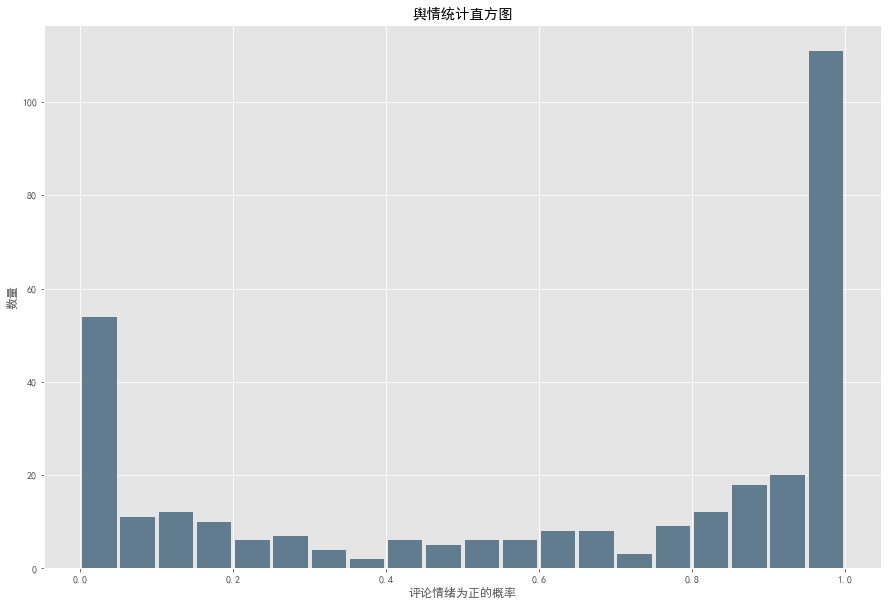

In [176]:
fig12 = plt.figure(2,figsize=(15,10))
frame.scores.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.xlabel('评论情绪为正的概率')
plt.ylabel('数量')
plt.title('舆情统计直方图')

Populating the interactive namespace from numpy and matplotlib


C:\Users\91550\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ylim', 'legend', 'xlim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


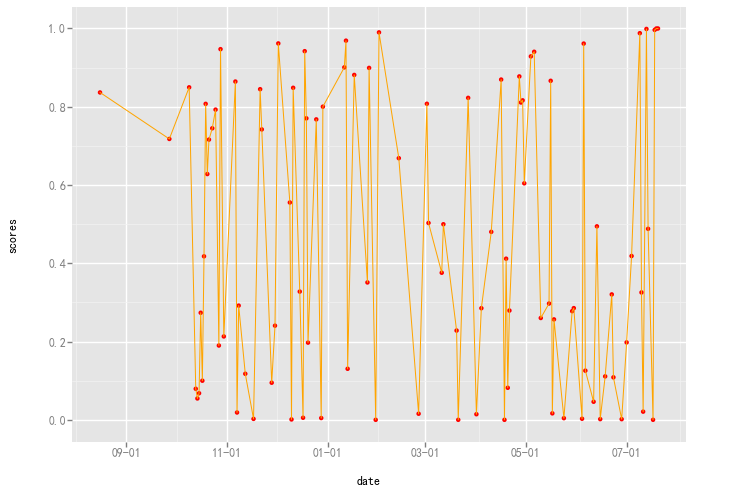

<ggplot: (137173388657)>

In [148]:
%pylab inline
from ggplot import *
fig2 = plt.figure(2,figsize=(20,10))
#day_average = pd.DataFrame(day_average).reset_index()
p = ggplot(aes(x="date", y="scores"), data=day_average)  + geom_point(color = 'red') + geom_line(color = 'orange') + scale_x_date(labels = date_format("%m-%d"))
p